### Feature selection in Regression using correlation

#### Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import LinearSVR
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
data = pd.read_csv('./CarPricesData.csv')

In [3]:
data.head(5)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [4]:
data.isnull().mean()*100

Price        0.000000
Age          0.139276
KM           0.000000
FuelType     0.278552
HP           0.000000
MetColor     0.000000
Automatic    0.000000
CC           0.139276
Doors        0.000000
Weight       0.139276
dtype: float64

In [5]:
data.dropna(inplace=True)

In [6]:
data.duplicated().sum()

1

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
le = LabelEncoder()

In [9]:
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = le.fit_transform(data[i])

In [10]:
data.sample(5)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
365,10500,41.0,22780,2,86,1,0,1300.0,5,1035.0
484,9500,54.0,62519,2,97,0,0,1400.0,3,1025.0
1227,7250,78.0,84000,2,110,1,0,1600.0,5,1065.0
918,8950,65.0,57374,2,110,1,0,1600.0,5,1075.0
43,16950,27.0,110404,1,90,0,0,2000.0,5,1255.0


#### Feature selection is performed using Pearson’s Correlation Coefficient via the f_regression() function.

The scikit-learn machine library provides an implementation of the correlation statistic in the
f_regression() function. This function can be used in a feature selection strategy, such as
selecting the top k most relevant features (largest values) via the SelectKBest class.

For example, we can define the SelectKBest class to use the f_regression() function and
select all features, then transform the train and test sets.

#### Selecting the features and targets

In [11]:
x = data.iloc[:,1:].values
y = data.iloc[:,0].values

#### Splitting the data into training and testing sets

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

#### Checking model scores without feature selection

In [13]:
model = LinearRegression()

In [14]:
model.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test)

In [16]:
model.score(x_train,y_train)

0.861762477331229

In [17]:
model.score(x_test,y_test)

0.8708517690870113

#### Defining feature selection with all features included

In [18]:
fs = SelectKBest(score_func=f_regression,k = 'all')

#### Fitting the fs

In [19]:
fs.fit(x_train,y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x000001E5732F9EE0>)

##### We can then print the scores for each variable (largest is better) and plot the scores for each variable as a bar graph to get an idea of how many features we should select.

#### Checking the scores for the features

In [20]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 3723.096607
Feature 1: 589.688041
Feature 2: 0.007963
Feature 3: 137.680309
Feature 4: 10.973220
Feature 5: 0.873022
Feature 6: 23.886260
Feature 7: 40.573243
Feature 8: 506.819328


#### Plotting the scores in a bar grapgh

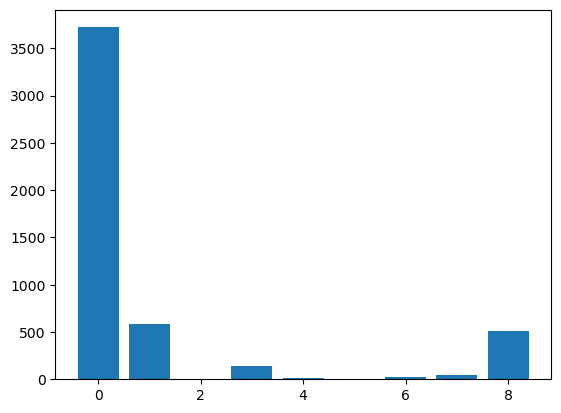

In [21]:
plt.bar([i for i in range(len(fs.scores_))],fs.scores_)
plt.show()

##### The plot clearly shows 4 features are a lot more important than the other features. We could set k=4 When configuring the SelectKBest to select these top features.

#### Selecting k = 4

In [22]:
fs = SelectKBest(score_func=f_regression,k = 4)

#### Transorm the train and test data

In [23]:
fs.fit(x_train,y_train)

SelectKBest(k=4, score_func=<function f_regression at 0x000001E5732F9EE0>)

In [24]:
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [25]:
x_test_fs.shape

(285, 4)

In [26]:
x_train_fs.shape

(1140, 4)

In [27]:
model =LinearRegression()

In [28]:
model.fit(x_train_fs,y_train)

LinearRegression()

In [29]:
y_pred_fs = model.predict(x_test_fs)

In [30]:
model.score(x_train_fs,y_train)

0.8581005278601517

In [31]:
model.score(x_test_fs,y_test)

0.8660327850546731

#### Selecting only the top feature

In [32]:
fs = SelectKBest(score_func=f_regression,k=1)

##### Fitting the fs

In [33]:
fs.fit(x_train,y_train)

SelectKBest(k=1, score_func=<function f_regression at 0x000001E5732F9EE0>)

##### Transforming the training and testing data

In [34]:
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [35]:
model.fit(x_train_fs,y_train)

LinearRegression()

In [36]:
model.score(x_train_fs,y_train)

0.7658964443630741

In [37]:
model.score(x_test_fs,y_test)

0.78439624199139

##### We can see that there is 76 % of accuracy just by using only one variable.